# Sentiment Analysis of IMDB Movie Reviews.

# Problem Statement:

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

# Import the basic libraries.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset.

In [15]:
dataset = pd.read_csv("IMDB Dataset.csv")

# Explore the dataset.

In [16]:
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# Explore the Distribution of the classes in the dataset.

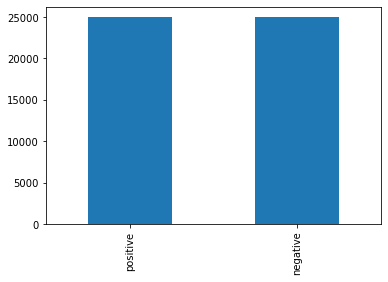

In [17]:
sentiment_plot = dataset['sentiment'].value_counts().plot(kind = 'bar')
fig = sentiment_plot.get_figure()
fig.savefig("class_distribution.png")

# WordCloud Visualizations.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

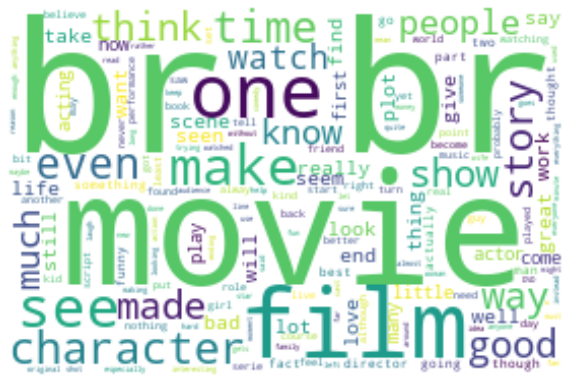

In [18]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
def display_cloud(data,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(dataset['review'],'sky.png','red')

# Wordclouds for positive reviews.

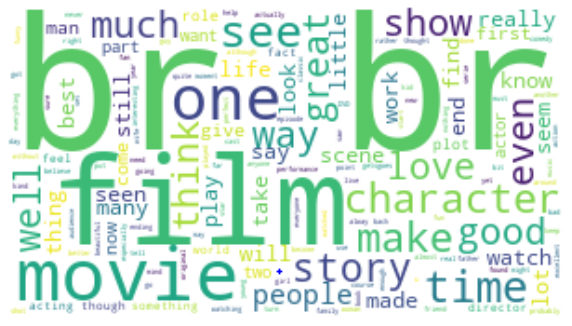

In [19]:
count_good=dataset[dataset['sentiment']=='positive']
display_cloud( count_good['review'],'sun1.png','blue')

# Wordlcouds for negative reviews.

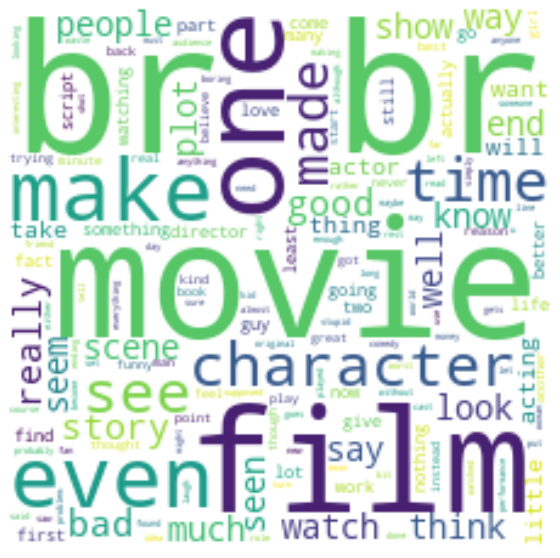

In [20]:
count_bad=dataset[dataset['sentiment']=='negative']
display_cloud( count_bad['review'],'sun2.png','blue')

# Let's take one review as sample and understand why we need to clean the text.

In [21]:
review = dataset['review'].loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

# The raw text is pretty messy for these reviews so before we can do any analytics we need to clean things up

<b>Normally any NLP task involves following text cleaning techniques</b>

1. Removal of HTML contents like "< br>".

2. Removal of punctutions, special characters like '\'.

3. Removal of stopwords like is, the which do not offer much insight.

4. Stemming/Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.

5. Vectorization - Encode the numeric values once you have cleaned it.

6. Fit the data to the ML model.

<b>We will apply all these techniques on this sample review and understand how it works.</b>

## First of all we will remove HTML contents on the previous review

In [22]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

## We can see that HTML tags are removed; so in the next step we will remove everything except lower/upper case letters using Regular Expressions

In [23]:
import re

review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z0-9]', ' ', review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

## Next we will bring everything into lowercase.

In [24]:
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

## Removing stop words

Stop words are the very common words like 'a', ‘if’, ‘but’, ‘we’, ‘he’, ‘she’, ‘they’ etc. We can usually remove these words without changing the semantics of a text and doing so often (but not always) improves the performance of a model. Removing these stop words becomes a lot more useful when we start using longer word sequences as model features. 


Since stopwords removal works on every word in your text we need to split the text.

## Tokenization of text

In [25]:
review = review.split()
review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

In [26]:
import nltk
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
review = [word for word in review if not word in set(stopwords.words('english'))]
review

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

# Normalizing words into there  basic root

## 1. stemming

Stemming is considered to be the more crude/brute-force approach to normalization (although this doesn’t necessarily mean that it will perform worse). There’s several algorithms, but in general they all use basic rules to chop off the ends of words.


In [28]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
review_s = [ps.stem(word) for word in review]
review_s

['wonder',
 'littl',
 'product',
 'film',
 'techniqu',
 'unassum',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sens',
 'realism',
 'entir',
 'piec',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'life',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sens',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

## 2. lemmatization(spelling correction)

Lemmatization works by identifying the part-of-speech of a given word and then applying more complex rules to transform the word into its true root.

In [29]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

We can see that 'little' has become 'littl' after Stemming but remained 'little' after Lemmatization. We will use Lemmatization.

Note: lexicon models like <b>Textblob </b> do the same job like lemmatization: spelling correction, tokenization...

# Merge the words to form cleaned up version of the text.

In [30]:
review = ' '.join(review)
review

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

# 1. Our next step will be to bring this text in mathematical forms and to do so we will create a Corpus first.

In [31]:
corpus = []
corpus.append(review)
corpus


['wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done']

## To vectorize the text we will apply:
    
1. CountVectorizer (Bag of Words Model)

2. TfidfVectorizer (Bag of Words Model)

3. Keras Tokenizer (Embedding)

Notice: A Bag of Words Model is used to convert text document to numerical vectors or bag of words

# n-grams
We can potentially add more predictive power to our model by adding two or three word sequences (bigrams or trigrams). For example, if a review had the three word sequence “didn’t love movie” we would only consider these words individually with a unigram-only model and probably not capture that this is actually a negative sentiment because the word ‘love’ by itself is going to be highly correlated with a positive review.

The scikit-learn library makes this really easy to play around with. Just use the ngram_range argument with any of the ‘Vectorizer’ classes.


# 1.1 CountVectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(ngram_range=(1, 3))
review_count_vec = count_vec.fit_transform(corpus)

review_count_vec.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]], dtype=int64)

So we can see the data has become numeric with 1,2 and 3s based on the number of times they appear in the text.


# 1.2 CountVectorizer with binary=True

In [33]:
count_vec_bin = CountVectorizer(binary=True, ngram_range=(1, 3))
review_count_vec_bin = count_vec_bin.fit_transform(corpus)

review_count_vec_bin.toarray()
review_count_vec_bin.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]], dtype=int64)

So there is no 2s and 3s in the vector.
 
 
We will now explore TF-IDF - TF stands for Text Frequency which means how many times a word (term) appears in a text (document). IDF means Inverse Document Frequency and is calculated as log(# of documents in corpus/# of documents containing the term).
Finally TF-IDF score is calculated as TF * IDF.

IDF acts as a balancing factor and diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

# 1.3 TfidfVectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))
review_tfidf_vec = tfidf_vec.fit_transform(corpus)

review_tfidf_vec.toarray()

array([[0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06030227, 0.06030227,
        0.06030227, 0.06030227, 0.06030227, 0.06

We will now apply all the techniques that we discussed on the whole dataset but there is no test dataset so we will keep 25% of the data aside to test the performance of the model.

# Split the dataset into train set and test set

In [35]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(dataset['review'], dataset['sentiment'],test_size=0.25, random_state=42)

# Convert sentiments to numeric forms.

In [36]:
train_data_label = (train_data_label.replace({'positive': 1, 'negative': 0})).values
test_data_label  = (test_data_label.replace({'positive': 1, 'negative': 0})).values

In [37]:
print(train_data_label.shape)
print(dataset_test.shape)

(37500,)
(12500,)


# Clean the text and build the train and test corpus.

In [38]:
corpus_train = []
corpus_test  = []

for i in range(dataset_train.shape[0]):
    soup = BeautifulSoup(dataset_train.iloc[i], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z0-9]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_train.append(review)
    
for j in range(dataset_test.shape[0]):
    soup = BeautifulSoup(dataset_test.iloc[j], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z0-9]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus_test.append(review)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


# Let's validate one sample entry.

In [39]:
corpus_train[-1]

'decent movie although little bit short time pack lot action grit commonsense emotion time frame matt dillon main character great job movie emotion intensity convincing tense throughout movie typical fancy expensive hollywood cgi action movie satisfying movie indeed price evening great movie movie straight traditional action movie great acting story directing would recommend movie character development character good make believe actually seeing real event taking place movie believe made cheaper budget acting quality much higher'

In [40]:
corpus_test[-1]

'wonderfully funny awe inspiring feature pioneer turntablism dj shadow q bert amazing terrific documentary check every major dj crediting getting scratch thanks herbie hancock post bop classic rockit archival footage complex mind blowing turntable routine time'

In [65]:
train_data_label

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

# Word cloud for one  positive review words after preprocessing

<function matplotlib.pyplot.show(*args, **kw)>

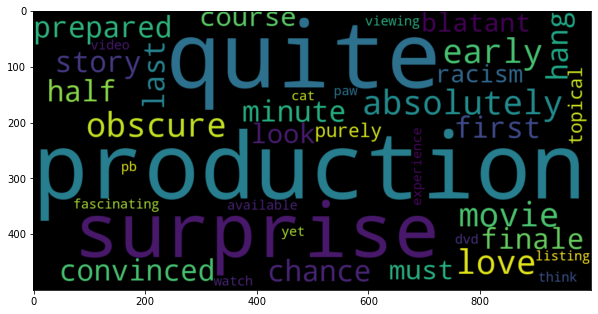

In [66]:
plt.figure(figsize=(10,10))
positive_text=corpus_train[-2]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# Word cloud fore one negative review words after preprocessing

<function matplotlib.pyplot.show(*args, **kw)>

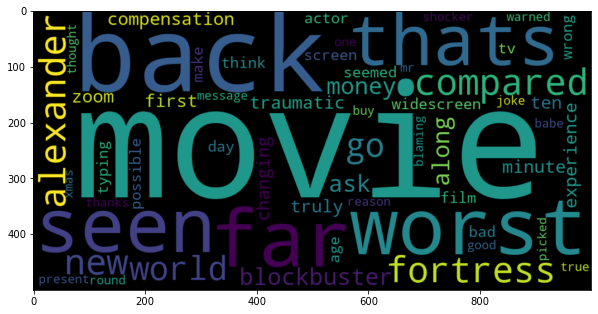

In [67]:
plt.figure(figsize=(10,10))
positive_text=corpus_train[2]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

In [68]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))

tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
tfidf_vec_test = tfidf_vec.transform(corpus_test)


In [69]:
count_vec = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train = count_vec.fit_transform(corpus_train)
count_vec_test = count_vec.transform(corpus_test)

# Fisrt model: Logistic regression

Now that we’ve transformed our dataset into a format suitable for modeling we can start building a classifier. Logistic Regression is a good baseline model for us to use for several reasons:

(1) They’re easy to interpret, 

(2) linear models tend to perform well on sparse datasets like this one,

(3) they learn very fast compared to other algorithms.


### Tfidfvectorization

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
lr = LogisticRegression(penalty='l2', max_iter=500, C=1 , random_state=42)
lr.fit(tfidf_vec_train, train_data_label)
lr_tfidf_predict = lr.predict(tfidf_vec_test)
print ("Accuracy for C=%s with tfidf: %s" 
       % (1, accuracy_score(test_data_label, lr_tfidf_predict)))


Accuracy for C=1 with tfidf: 0.88472


### Countvectorization

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
lr = LogisticRegression(penalty='l2', max_iter=500, C=1 , random_state=42)
lr.fit(count_vec_train, train_data_label)
lr_count_predict = lr.predict(count_vec_test)
print ("Accuracy for C=%s with count_vect: %s" 
       % (1, accuracy_score(test_data_label, lr_count_predict)))


Accuracy for C=1 with count_vect: 0.89872


# Classification report

In [105]:
lr_tfidf_report=classification_report(test_data_label, lr_tfidf_predict, target_names=['Positive','Negative'])
print("with tfidf :\n\n" ,lr_tfidf_report)

count_tfidf_report=classification_report(test_data_label, lr_count_predict, target_names=['Positive','Negative'])
print(" with count_vect :\n\n" ,count_tfidf_report)

with tfidf :

               precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      6157
    Negative       0.88      0.90      0.89      6343

    accuracy                           0.88     12500
   macro avg       0.89      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500

 with count_vect :

               precision    recall  f1-score   support

    Positive       0.90      0.89      0.90      6157
    Negative       0.90      0.91      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



# Confusion matrix

In [106]:
cm_tfidf=confusion_matrix(test_data_label,lr_tfidf_predict,labels=[1,0])
print("with tfidf :\n\n" ,cm_tfidf, "\n\n")

cm_count=confusion_matrix(test_data_label,lr_count_predict,labels=[1,0])
print("with count_vect :\n\n", cm_count, "\n\n")

with tfidf :

 [[5708  635]
 [ 806 5351]] 


with count_vect :

 [[5746  597]
 [ 669 5488]] 




# Second model: LinearSVM



Linear classifiers tend to work well on very sparse datasets (like the one we have). Another algorithm that can produce great results with a quick training time are Support Vector Machines with a linear kernel.

### TfidfVectorization

In [89]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C=0.5, max_iter=500, random_state=42)
linear_svc.fit(tfidf_vec_train, train_data_label)
tfidf_svm_predict = linear_svc.predict(tfidf_vec_test)
print ("Accuracy for C=%s with tfidf: %s" 
           % (0.5, accuracy_score(test_data_label, tfidf_svm_predict)))



Accuracy for C=0.5 with tfidf: 0.90272


### CountVectorization

In [93]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, max_iter=500, random_state=42)
linear_svc.fit(count_vec_train, train_data_label)
count_svm_predict = linear_svc.predict(tfidf_vec_test)
print ("Accuracy for C=%s with count_vect: %s" 
           % (0.5, accuracy_score(test_data_label, count_svm_predict)))


Accuracy for C=0.5 with count_vect: 0.87736


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Classification report

In [94]:
lsvm_tfidf_report=classification_report(test_data_label, tfidf_svm_predict, target_names=['Positive','Negative'])
print("with tfidf:\n\n", lsvm_tfidf_report, "\n\n")

lsvm_count_report=classification_report(test_data_label, count_svm_predict, target_names=['Positive','Negative'])
print("with count_vect:\n\n", lsvm_count_report,"\n\n")

with tfidf:

               precision    recall  f1-score   support

    Positive       0.91      0.89      0.90      6157
    Negative       0.89      0.92      0.91      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500
 


with count_vect:

               precision    recall  f1-score   support

    Positive       0.96      0.78      0.86      6157
    Negative       0.82      0.97      0.89      6343

    accuracy                           0.88     12500
   macro avg       0.89      0.88      0.88     12500
weighted avg       0.89      0.88      0.88     12500
 




# Confusion matrix

In [97]:
cm_tfidf=confusion_matrix(test_data_label,tfidf_svm_predict,labels=[1,0])
print("with tfidf :\n\n", cm_tfidf,"\n\n")

cm_count=confusion_matrix(test_data_label,count_svm_predict,labels=[1,0])
print("with count_vect :\n\n", cm_count,"\n\n")

with tfidf :

 [[5820  523]
 [ 693 5464]] 


with count_vect :

 [[6141  202]
 [1331 4826]] 




# Third model: Recurrent Neural Networks like LSTM

Here we have a different vectorization technique called Word Embeddings.

Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly, we do not have to specify this encoding by hand. An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer). It is common to see word embeddings that are 8-dimensional (for small datasets), up to 1024-dimensions when working with large datasets. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Masking, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [112]:
max_features = 20000
maxlen = 200
tokenizer = Tokenizer(num_words=max_features)

In [113]:
train = pd.DataFrame(dataset_train)
train.columns = ['review']

test = pd.DataFrame(dataset_test)
test.columns = ['review']

# Apply the Tokenizer.

In [114]:
tokenizer.fit_on_texts(train['review'])
X_train_token = tokenizer.texts_to_sequences(train['review'])

tokenizer.fit_on_texts(test['review'])
X_test_token = tokenizer.texts_to_sequences(test['review'])

# Apply the Padding.

In [115]:
X_train = pad_sequences(X_train_token, maxlen=maxlen, padding='post')
X_test  = pad_sequences(X_test_token, maxlen=maxlen, padding='post')
print(X_train.shape, X_test.shape)

(37500, 200) (12500, 200)


In [116]:
y_train = train_data_label.copy()
y_test  = test_data_label.copy()

In [117]:
model = Sequential([Embedding(max_features, 64, mask_zero=True),
                    Bidirectional(LSTM(64, dropout=0.2)),
                    Dense(64, activation='sigmoid'),
                    Dense(1)])

In [118]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [119]:
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=3,
                    validation_data=(X_test, y_test))

Epoch 1/3
750/750 [==============================] - 266s 355ms/step - loss: 7.6742 - accuracy: 0.5025 - val_loss: 7.8272 - val_accuracy: 0.4926
Epoch 2/3
750/750 [==============================] - 265s 354ms/step - loss: 7.6742 - accuracy: 0.5025 - val_loss: 7.8272 - val_accuracy: 0.4926
Epoch 3/3
750/750 [==============================] - 261s 348ms/step - loss: 7.6742 - accuracy: 0.5025 - val_loss: 7.8272 - val_accuracy: 0.4926


In [120]:
history.history

{'loss': [7.674231052398682, 7.674232482910156, 7.674233436584473],
 'accuracy': [0.5024799704551697, 0.5024799704551697, 0.5024799704551697],
 'val_loss': [7.827232360839844, 7.827232360839844, 7.827232360839844],
 'val_accuracy': [0.4925599992275238, 0.4925599992275238, 0.4925599992275238]}

<b> plotting the model performance</b>

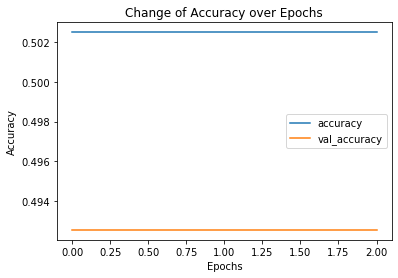

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

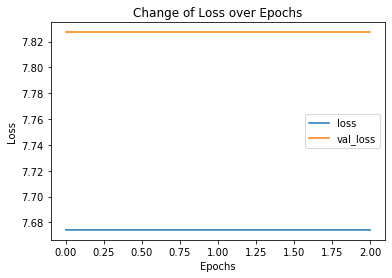

In [122]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

# Load the IMDB Dataset With Keras

# Fourth model: One-Dimensional Convolutional Neural Network

Convolutional neural networks were designed to honor the spatial structure in image data whilst being robust to the position and orientation of learned objects in the scene.

This same principle can be used on sequences, such as the one-dimensional sequence of words in a movie review. The same properties that make the CNN model attractive for learning to recognize objects in images can help to learn structure in paragraphs of words, namely the techniques invariance to the specific position of features.

Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

In [139]:
# CNN for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [140]:
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=3,
                    validation_data=(X_test, y_test))

Epoch 1/3
500/500 [==============================] - 42s 84ms/step - loss: 0.1856 - accuracy: 0.9258 - val_loss: 0.3063 - val_accuracy: 0.8769
Epoch 2/3
500/500 [==============================] - 40s 81ms/step - loss: 0.0892 - accuracy: 0.9700 - val_loss: 0.3857 - val_accuracy: 0.8694
Epoch 3/3
500/500 [==============================] - 43s 85ms/step - loss: 0.0300 - accuracy: 0.9920 - val_loss: 0.5353 - val_accuracy: 0.8683


In [141]:
history.history

{'loss': [0.18562254309654236, 0.08915640413761139, 0.029991356655955315],
 'accuracy': [0.9257599711418152, 0.9700000286102295, 0.9919999837875366],
 'val_loss': [0.3063129186630249, 0.38570648431777954, 0.5353374481201172],
 'val_accuracy': [0.8768799901008606, 0.8694400191307068, 0.8683199882507324]}

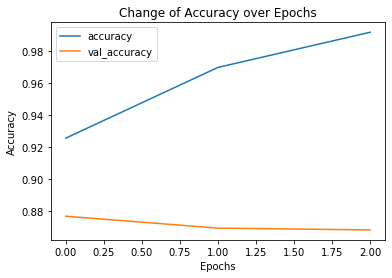

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

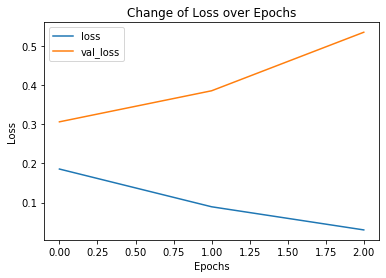

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

# Fifth model: CNN_LSTM with dropout.

In [134]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


# fix random seed for reproducibility
np.random.seed(7)


# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)


# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 250, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
________________________________________________

In [135]:
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=3,
                    validation_data=(X_test, y_test))

Epoch 1/3
500/500 [==============================] - 307s 614ms/step - loss: 0.1933 - accuracy: 0.9266 - val_loss: 0.3131 - val_accuracy: 0.8797
Epoch 2/3
500/500 [==============================] - 308s 617ms/step - loss: 0.1613 - accuracy: 0.9400 - val_loss: 0.3000 - val_accuracy: 0.8837
Epoch 3/3
500/500 [==============================] - 305s 610ms/step - loss: 0.1425 - accuracy: 0.9474 - val_loss: 0.3478 - val_accuracy: 0.8800


In [136]:
history.history

{'loss': [0.19330567121505737, 0.16128669679164886, 0.14245198667049408],
 'accuracy': [0.9265999794006348, 0.9399999976158142, 0.9474400281906128],
 'val_loss': [0.3131190836429596, 0.29998040199279785, 0.3477502763271332],
 'val_accuracy': [0.8797199726104736, 0.8837199807167053, 0.8799600005149841]}

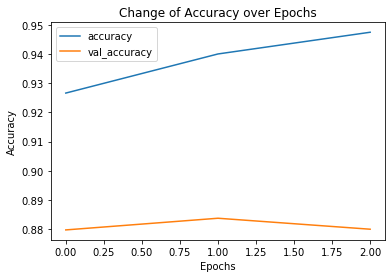

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

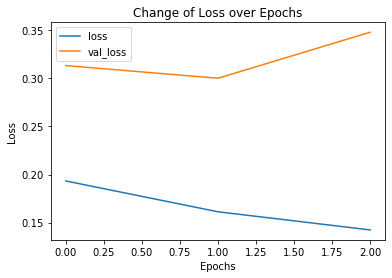

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()